# Lab 07 : T-SNE - demo

In [1]:
# Load libraries

# Math
import numpy as np

# Import data
import scipy.io

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import time

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import compute_pca
from lib.utils import construct_knn_graph
from lib.utils import nldr_visualization
from lib.utils import construct_kernel

# Import
import scipy.sparse.linalg
import time
import scipy.ndimage

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# t-SNE visualization
from sklearn.manifold import TSNE

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

### 1000 Horizontal and vertical rectangles

1000 1600 40 40


<IPython.core.display.Javascript object>


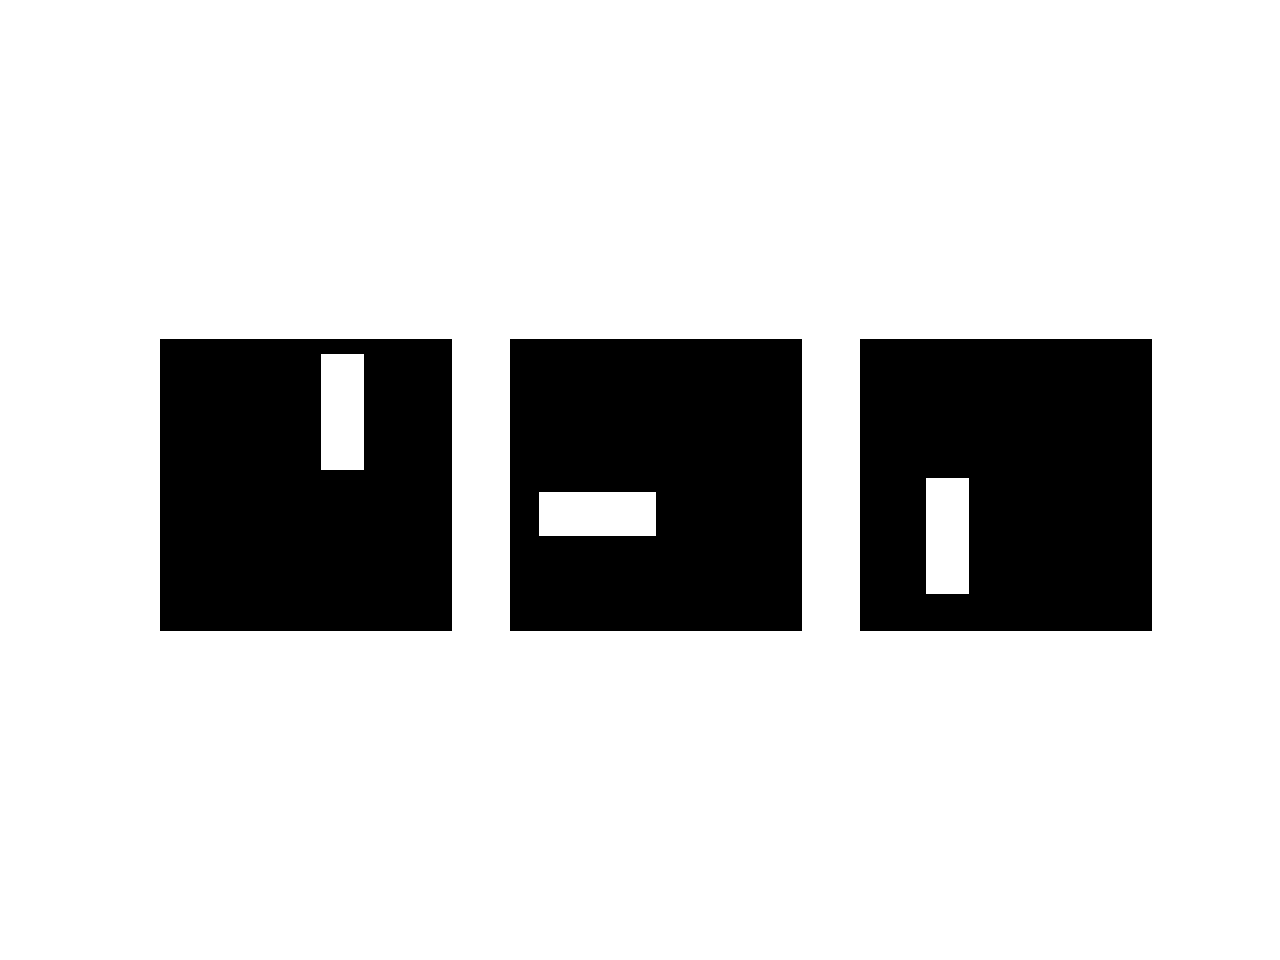

In [2]:
# Horizontal and vertical rectangles
mat = scipy.io.loadmat('../../data/graph/rectangles.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Ny = mat['Ny'].squeeze()
Nx = mat['Nx'].squeeze()
Cgt = mat['Cgt'].squeeze()
print(n,d,Nx,Ny)

plt.figure(1)
rotated_img = scipy.ndimage.rotate(np.reshape(X[0,:],[Nx,Ny]), 0)
plt.subplot(131).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[678,:],[Nx,Ny]), 0)
plt.subplot(132).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
rotated_img = scipy.ndimage.rotate(np.reshape(X[260,:],[Nx,Ny]), 0)
plt.subplot(133).imshow(rotated_img, interpolation='nearest', cmap='Greys_r')
plt.axis('equal')
plt.axis('off')
plt.show()

Time (sec): 27.765465259552002


<IPython.core.display.Javascript object>


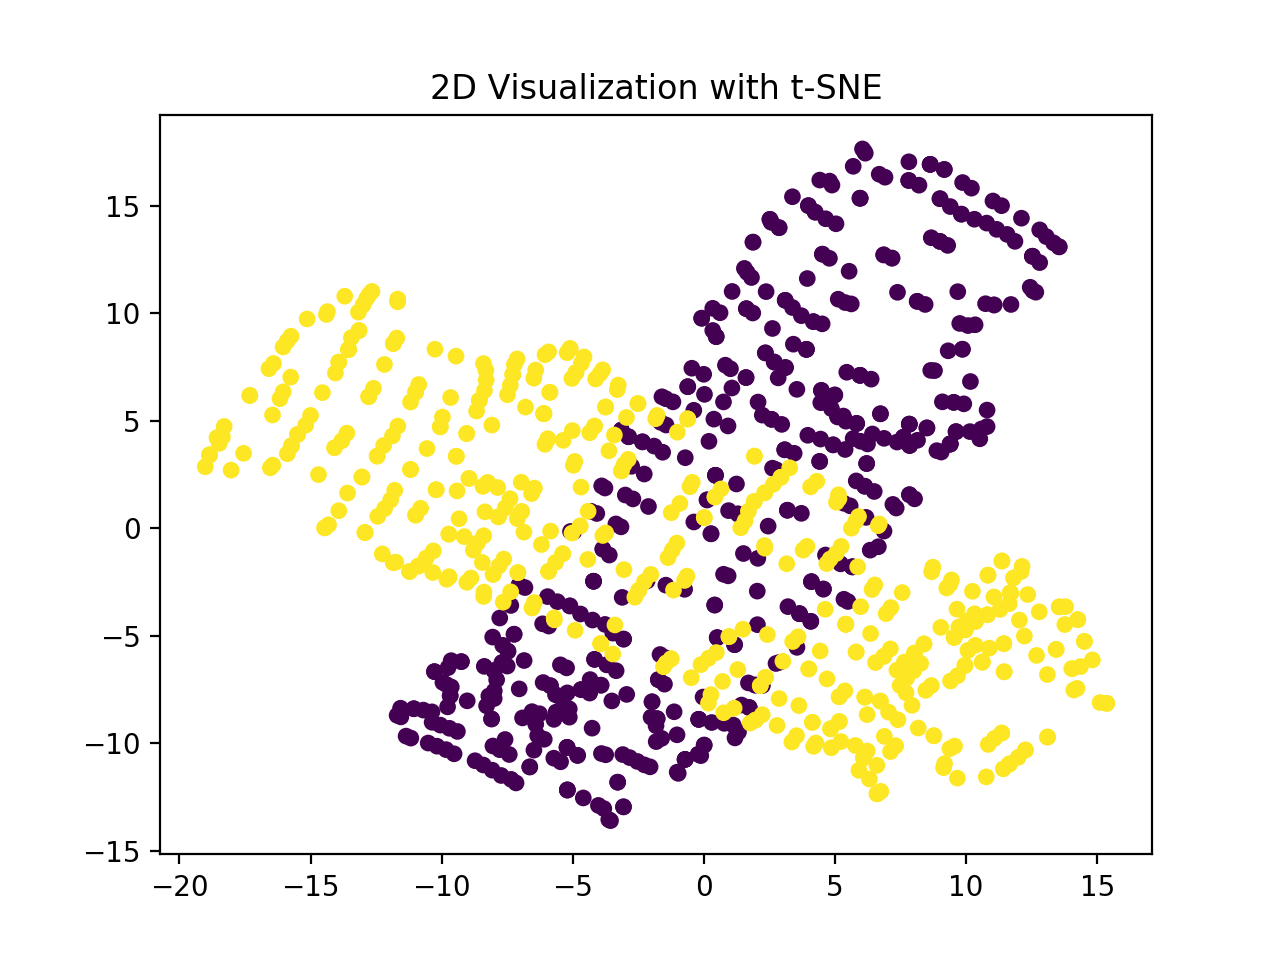

<IPython.core.display.Javascript object>


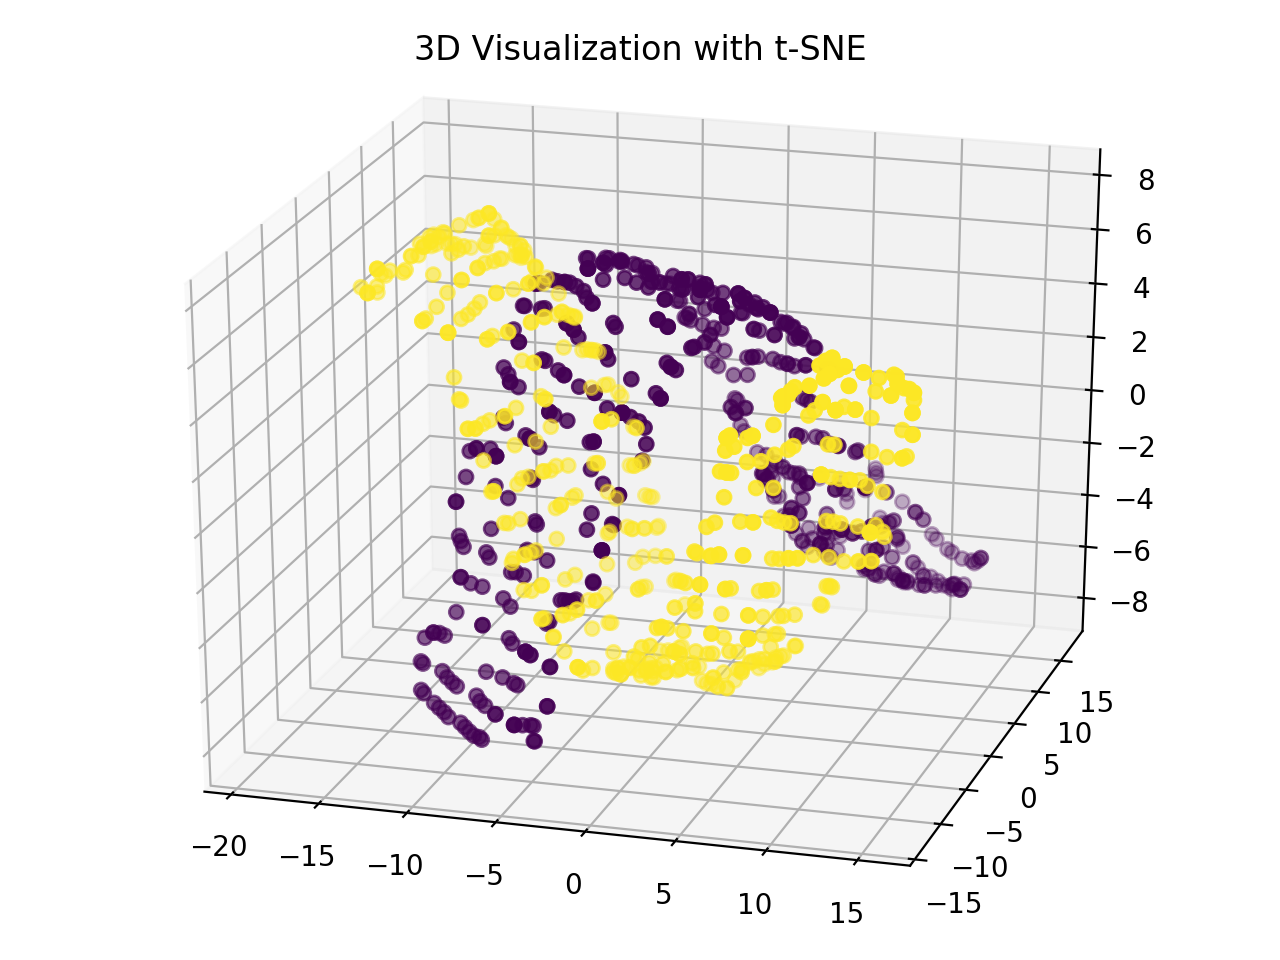

In [3]:
# Run t-SNE (long, initialization-dependent)

start = time.time()
model = TSNE( n_components=3, init='pca', random_state=0 ) # n_iter=1000
XtSNE = model.fit_transform(X) # Xtsne = n x d, 26sec
print('Time (sec):',time.time() - start)

Xtsne = XtSNE[:,0]
Ytsne = XtSNE[:,1]
Ztsne = XtSNE[:,2]

# 2D Plot
plt.figure(2)
size_vertex_plot = 25
plt.scatter(Xtsne, Ytsne, s=size_vertex_plot*np.ones(n), c=Cgt)
plt.title('2D Visualization with t-SNE') 
plt.show()

# 3D Plot
fig = pylab.figure(3)
ax = Axes3D(fig)
size_vertex_plot = 25
ax.scatter(Xtsne, Ytsne, Ztsne, s=size_vertex_plot*np.ones(n), c=Cgt)
plt.title('3D Visualization with t-SNE') 
pyplot.show() 

### 4,000 text documents

01 - autos<br>
02 - sport - baseball<br>
03 - med<br>
04 - politics - guns<br>
05 - comp.graphics<br>

unique words = 7,939

In [4]:
# Load 5 classes of 4,000 text documents
mat = scipy.io.loadmat('../../data/graph/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print('Number of data =',n)
print('Data dimensionality =',d);
print('Number of classes =',nc);

X = X.toarray()
X = X - np.mean(X,axis=0)
X = ( X.T / np.sqrt(np.sum(X**2,axis=1)+1e-10) ).T
print(X.shape)


Number of data = 2000
Data dimensionality = 7939
Number of classes = 5
(2000, 7939)


<IPython.core.display.Javascript object>


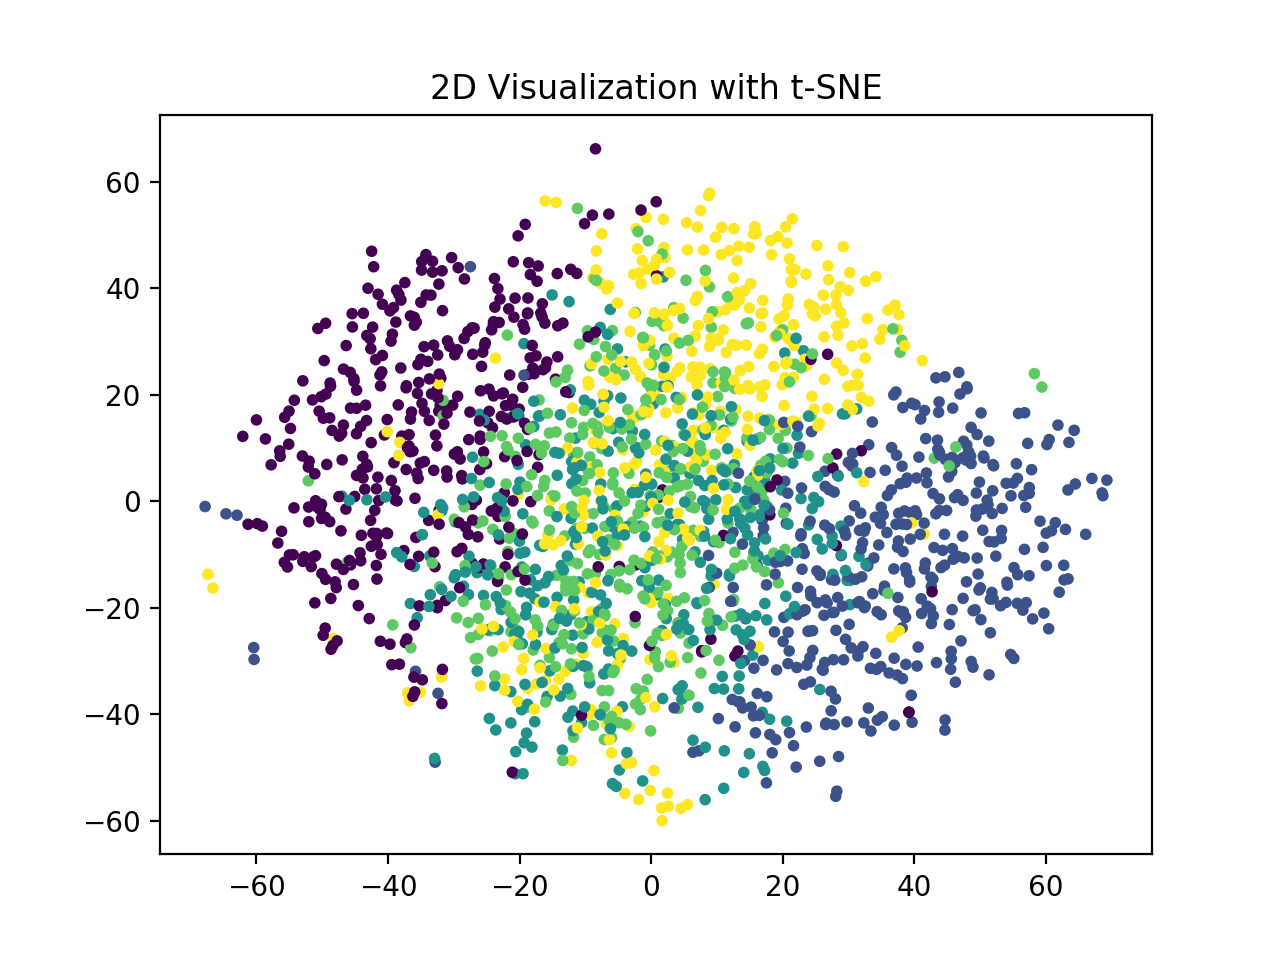

<IPython.core.display.Javascript object>


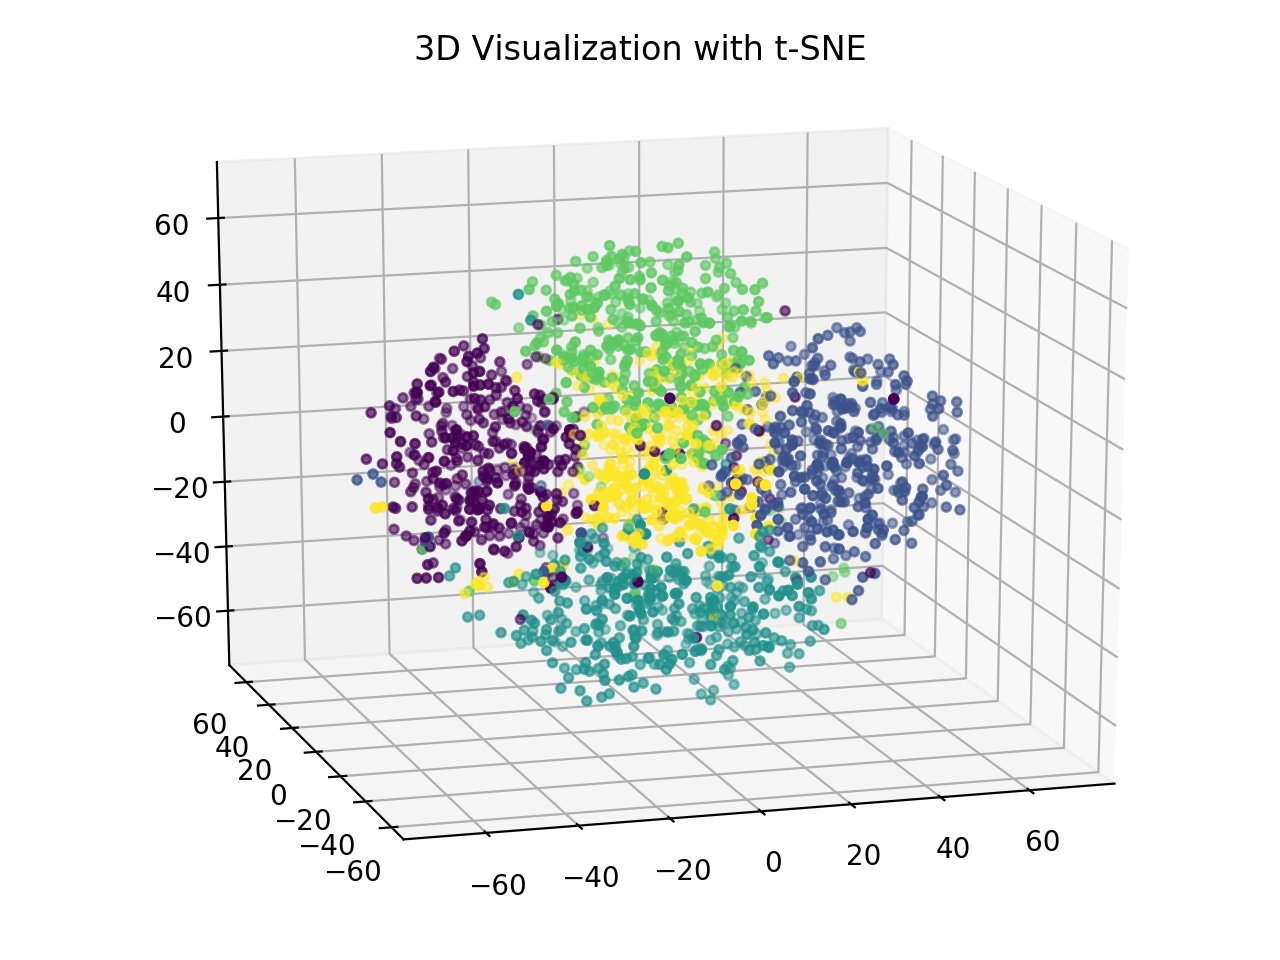

In [6]:
# Run T-SNE

run_TSNE = True
run_TSNE = False
if run_TSNE == True:
    start = time.time()
    model = TSNE(n_components=3)
    XtSNE = model.fit_transform(X) # Xtsne = n x d, 180sec
    print('Time (sec):',time.time() - start)
    np.savez('../../data/graph/TSNE_20NEWS.npz', XtSNE=XtSNE)
else:
    XtSNE = np.load('../../data/graph/TSNE_20NEWS.npz')['XtSNE'] 

Xtsne = XtSNE[:,0]
Ytsne = XtSNE[:,1]
Ztsne = XtSNE[:,2]

# 2D Plot
plt.figure(10)
size_vertex_plot = 10
plt.scatter(Xtsne, Ytsne, s=size_vertex_plot*np.ones(n), c=Cgt)
plt.title('2D Visualization with t-SNE') 
plt.show()

# 3D Plot
fig = pylab.figure(11)
ax = Axes3D(fig)
size_vertex_plot = 10
ax.scatter(Xtsne, Ytsne, Ztsne, s=size_vertex_plot*np.ones(n), c=Cgt)
plt.title('3D Visualization with t-SNE') 
pyplot.show() 
